# Business Understanding

Menyediakan tool untuk analisis sentimen dengan target user masyarakat umum atau perusahaan yang ingin memanfaatkan hasil sentimen.

# Data Collection

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from IPython.display import clear_output
!pip install -U deep-translator
clear_output()

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=5873ad26c2b0baf5caadf165565fa757011a28c7621d2f21d6e7b60d69991add
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling char

In [ ]:
# Import library

# Data Preparation
import pandas as pd

# Data Discovery
import matplotlib.pyplot as plt
import numpy as np

# NLP Preprocessing
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

# Modeling
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn import metrics

# Oversampling
from googletrans import Translator

In [ ]:
# Set the max columns to none

pd.set_option('display.max_columns', None)

In [ ]:
# Login Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read Dataset use Google Drive

data1 = pd.read_csv('gdrive/My Drive/Youtube/[Roberta]_Jokowi di KTT OKI- Israel Gunakan Narasi Self-Defence Bunuh Rakyat Sipil 11-14-2023.csv')
data2 = pd.read_csv('gdrive/My Drive/Youtube/[Roberta]_Kebohongan Sains Modern 11-15-2023.csv')
data3 = pd.read_csv('gdrive/My Drive/Youtube/[Roberta]_Kelanjutan_Dana_Desa.csv')
data4 = pd.read_csv('gdrive/My Drive/Youtube/[Roberta]_Prabowo-Gibran Kantongi Khofifah-Ridwan Kamil Jadi Timses - tvOne Minute 11-14-2023.csv')
data5 = pd.read_csv('gdrive/My Drive/Youtube/[Roberta]_Youtube Rewind INDONESIA 2018 - Rise 11-15-2023.csv')
data6 = pd.read_csv('gdrive/My Drive/Youtube/data.csv',  encoding='latin-1')

In [ ]:
data6 = data6.rename(columns={'Abusive': 'label'})

In [ ]:
data6 = data6.rename(columns={'Tweet': 'comment'})

In [ ]:
def label_to_sentiment(label):
    if label == 1:
        return 'Negative'
    elif label == 0:
        return 'Positive'
    else:
        return 'Undefined'

In [ ]:
data6['label'] = data6['label'].apply(label_to_sentiment)

In [ ]:

data1 = data1.rename(columns={'text_data': 'comment'})
data2 = data2.rename(columns={'text_data': 'comment'})
data3 = data3.rename(columns={'text_data': 'comment'})
data4 = data4.rename(columns={'text_data': 'comment'})
data5 = data5.rename(columns={'text_data': 'comment'})
data6 = data6.rename(columns={'text_data': 'comment'})

In [ ]:
df = pd.concat([data1[['comment', 'label']], data2[['comment', 'label']], data3[['comment', 'label']], data4[['comment', 'label']], data5[['comment', 'label']], data6[['comment', 'label']]], axis=0)

In [ ]:
df

comment     label
0            Santai tapi pasti... Sangat tegas narasinya  Negative
1      Aamiin.... Giliran  pk ganjar  nolak israel  d...  Negative
2      Â @MbahMu9829Â masih ada aja ya orang dengki k...  Negative
3      â€‹Â @MbahMu9829Â klau bukan moncong putih pas...  Negative
4      Amangnya siapa yang ngejaja??? Mau merdeka sil...  Negative
...                                                  ...       ...
13164  USER jangan asal ngomong ndasmu. congor lu yg ...  Negative
13165                       USER Kasur mana enak kunyuk'  Negative
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...  Positive
13167  USER USER USER USER Bom yang real mudah terdet...  Positive
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...  Negative

[13854 rows x 2 columns]

# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13854 entries, 0 to 13168
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  13854 non-null  object
 1   label    13854 non-null  object
dtypes: object(2)
memory usage: 324.7+ KB


In [ ]:
df.dtypes

comment    object
label      object
dtype: object

# Data Cleaning

In [ ]:
df.isna().sum()

comment    0
label      0
dtype: int64

# Data Discovery

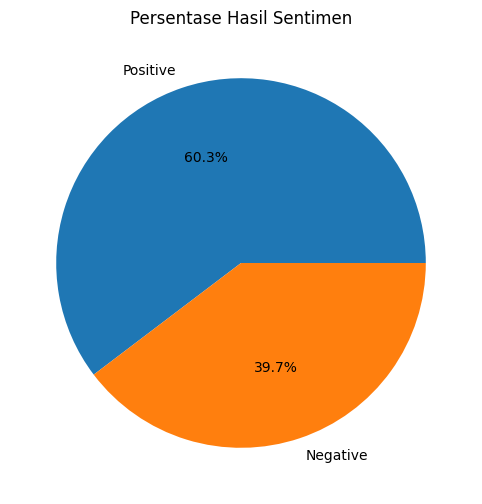

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["label"].value_counts(),
        autopct="%1.1f%%",
        labels=df['label'].value_counts().index)
plt.title("Persentase Hasil Sentimen")
plt.show()

In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

Positive    8357
Negative    5497
Name: label, dtype: int64


# Balancing Dataset

In [ ]:
# Assuming 'label' is the column containing 'positive' and 'negative'
negative_rows = df[df['label'] == 'Negative']
positive_rows = df[df['label'] == 'Positive']

In [ ]:
# Fungsi untuk menerjemahkan teks menggunakan deep_translator
def translate_text(text):
    translated_text = GoogleTranslator(source='auto', target='en').translate(text)
    back_translated_text = GoogleTranslator(source='auto', target='id').translate(translated_text)
    return back_translated_text

# Menerjemahkan kolom 'comment' dalam DataFrame df
negative_rows['comment'] = negative_rows['comment'].apply(translate_text)

<ipython-input-74-d53759aed653>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_rows['comment'] = negative_rows['comment'].apply(translate_text)


In [ ]:
negative_rows = pd.concat([negative_rows, backtranslation])

In [ ]:
# Keep up to 330 rows of 'negative' and all rows of 'positive'
dft = pd.concat([positive_rows.head(1944), negative_rows])

In [ ]:
dft.to_csv('dataset_oversampling.csv', index=False)

In [ ]:
dft

comment     label
8     Ingat bong.. PENJAJAHAN DI ATAS DUNIA HARUS DI...  Positive
14    Betul sekali kata2 loo... palestina tidak ikut...  Positive
30    Â @ariyulianto443Â  dan juga sdh bukti penghan...  Positive
31    Cari Kemerdekaan buat Palestina itu yang negar...  Positive
32    Palestina menyatakan kemerdekaannya tahun 1988...  Positive
...                                                 ...       ...
5492  Orang brengsek macam apa yang membuatku menguc...  Negative
5493  Kepala Polisi Babi! Liar dan Bodoh! Saya tidak...  Negative
5494  PENGGUNA, jangan mulai berbicara tentang diri ...  Negative
5495                USER Kasur mana yang nyaman kunyuk'  Negative
5496  USER Dimana disana memberi (": itu hanya foto,...  Negative

[12938 rows x 2 columns]

# Data Cleaning after Balancing Dataset

In [ ]:
dft.dtypes

comment    object
label      object
dtype: object

In [ ]:
dft.isna().sum()

comment    1
label      0
dtype: int64

In [ ]:
dft.dropna(inplace=True)

# NLP Preprocessing

In [ ]:
def text_cleaning(data):
  temporary_text = []

  for text in data:
    # Menghapus link [https://blabala.com]
    text = re.sub(r"http\S+", "", text)

    # Menghapus baris baru
    text = re.sub('\n', '', text)

    # Menghapus RT
    text = re.sub('RT', '', text)

    # Menghapus karakter yang tidak diinginkan
    text = re.sub("[^a-zA-Z^']", " ", text)
    text = re.sub(" {2,}", " ", text)

    # Menghapus leading dan trailing whitespace
    text = text.strip()

    # Menghapus whitespace dengan a single space
    text = re.sub(r'\s+', ' ', text)

    # Konversi text to Lowercase
    text = text.lower();
    temporary_text.append(text)
  return temporary_text

dft['comment'] = text_cleaning(dft['comment'])
dft

comment     label
0      ingat bong penjajahan di atas dunia harus diha...  Positive
1      betul sekali kata loo palestina tidak ikut per...  Positive
2      ariyulianto dan juga sdh bukti penghancur gaza...  Positive
3      cari kemerdekaan buat palestina itu yang negar...  Positive
4      palestina menyatakan kemerdekaannya tahun dan ...  Positive
...                                                  ...       ...
12933  orang brengsek macam apa yang membuatku menguc...  Negative
12934  kepala polisi babi liar dan bodoh saya tidak p...  Negative
12935  pengguna jangan mulai berbicara tentang diri a...  Negative
12936                user kasur mana yang nyaman kunyuk'  Negative
12937  user dimana disana memberi itu hanya foto kuti...  Negative

[12937 rows x 2 columns]

In [ ]:
# Mengubah kata berimbuhan menjadi kata dasar
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text   = stemmer.stem(text)
    return text

dft['comment'] = dft['comment'].apply(stemming)

In [ ]:
#  Tokenisasi kata
def tokenized(data):
  return data.apply(nltk.word_tokenize)
dft['comment'] = tokenized(dft['comment'])
dft.head()

comment     label
0  [ingat, bong, jajah, di, atas, dunia, harus, h...  Positive
1  [betul, sekali, kata, loo, palestina, tidak, i...  Positive
2  [ariyulianto, dan, juga, sdh, bukti, hancur, g...  Positive
3  [cari, merdeka, buat, palestina, itu, yang, ne...  Positive
4  [palestina, nyata, merdeka, tahun, dan, sdh, j...  Positive

# Modeling

In [ ]:
max_features = 1000
tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='OOV')
tokenizer.fit_on_texts(dft['comment'].values)
X = tokenizer.texts_to_sequences(dft['comment'].values)
X = pad_sequences(X)

In [ ]:
def sentiment_to_label(sentiment):
    if sentiment == 'Negative':
        return 1
    elif sentiment == 'Positive':
        return 0
    else:
        return 'Undefined'

dft['label'] = dft['label'].apply(sentiment_to_label)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential([
    Embedding(max_features, embed_dim, input_length=X.shape[1]),
    SpatialDropout1D(0.4),
    LSTM(128, return_sequences=True),  # Layer pertama LSTM
    LSTM(64, return_sequences=True),   # Layer kedua LSTM
    LSTM(lstm_out),                    # Layer ketiga LSTM
    Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 188, 128)          128000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 188, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_6 (LSTM)               (None, 188, 128)          131584    
                                                                 
 lstm_7 (LSTM)               (None, 188, 64)           49408     
                                                                 
 lstm_8 (LSTM)               (None, 196)               204624    
                                                                 
 dense_2 (Dense)             (None, 2)                 394       
                                                      

In [ ]:
Y = pd.get_dummies(dft['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9055, 299) (9055, 2)
(3882, 299) (3882, 2)


In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_validation.shape,Y_validation.shape)

(7244, 188) (7244, 2)
(1811, 188) (1811, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
227/227 - 138s - loss: 0.4089 - accuracy: 0.8491 - 138s/epoch - 607ms/step
Epoch 2/5
227/227 - 128s - loss: 0.3232 - accuracy: 0.8740 - 128s/epoch - 563ms/step
Epoch 3/5
227/227 - 124s - loss: 0.2633 - accuracy: 0.8937 - 124s/epoch - 548ms/step
Epoch 4/5
227/227 - 127s - loss: 0.2353 - accuracy: 0.9075 - 127s/epoch - 557ms/step
Epoch 5/5
227/227 - 127s - loss: 0.2178 - accuracy: 0.9126 - 127s/epoch - 560ms/step


In [ ]:
score,acc = model.evaluate(X_validation, Y_validation, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

57/57 - 10s - loss: 0.2537 - accuracy: 0.8978 - 10s/epoch - 182ms/step
score: 0.25
acc: 0.90


In [ ]:
Y_pred = model.predict(X_validation)

57/57 [==============================] - 13s 181ms/step


In [ ]:
# Mendapatkan kelas prediksi berdasarkan nilai tertinggi
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Konversi label aktual menjadi kelas
Y_true = np.argmax(Y_validation, axis=1)

# Membuat classification report
class_report = classification_report(Y_true, Y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       270
           1       0.94      0.95      0.94      1541

    accuracy                           0.90      1811
   macro avg       0.80      0.79      0.79      1811
weighted avg       0.90      0.90      0.90      1811




Confusion Matrix:


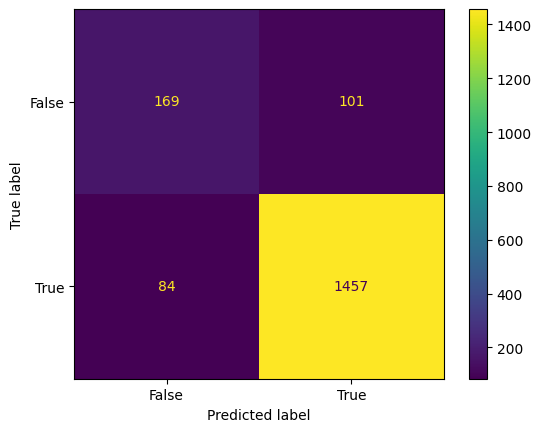

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)
print("\nConfusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
